<a href="https://colab.research.google.com/github/Garry1970/Garry1970/blob/main/%D0%97%D0%A2%D0%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy

In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [ ]:
pip install scikit-learn

In [ ]:
pip install scipy

In [ ]:
pip install plotly

In [ ]:
pip install cufflinks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.4 MB/s eta 0:00:00


In [ ]:
pip install bokeh

In [ ]:
pip install statsmodels

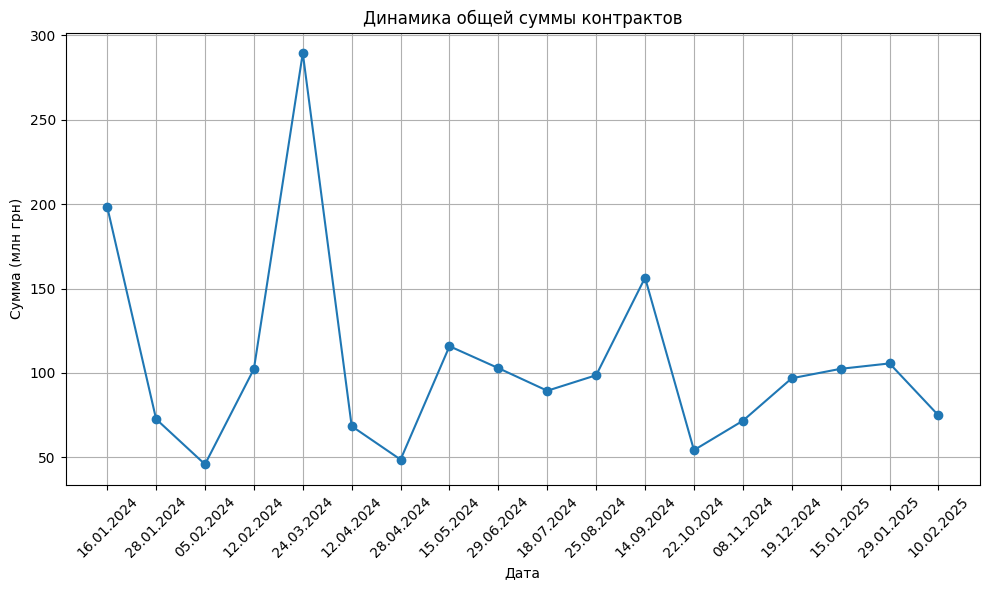

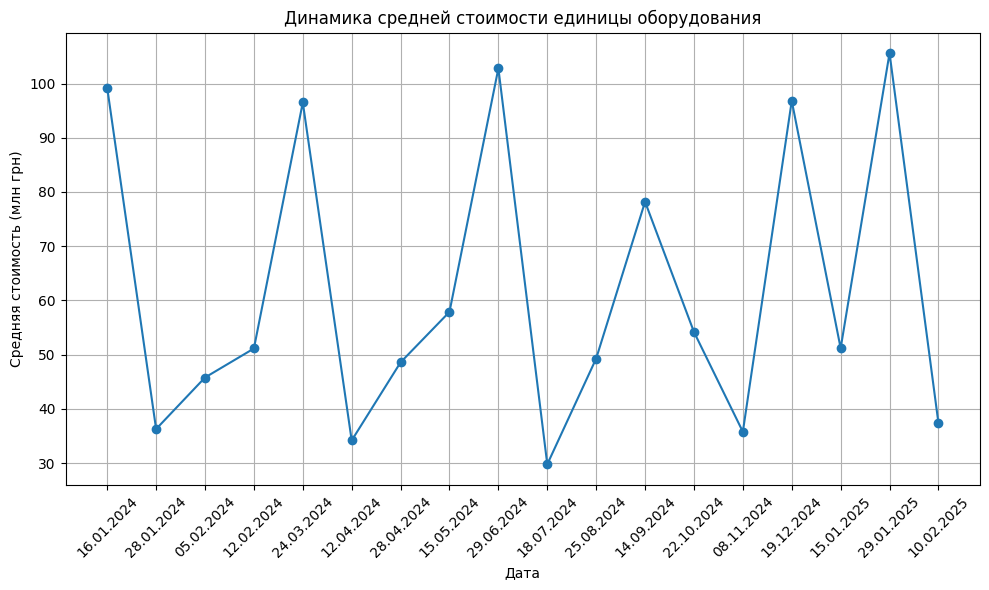

<ipython-input-13-f41675fb34cb>:54: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_2024 = df[pd.to_datetime(df['Дата тендера']).dt.year == 2024]


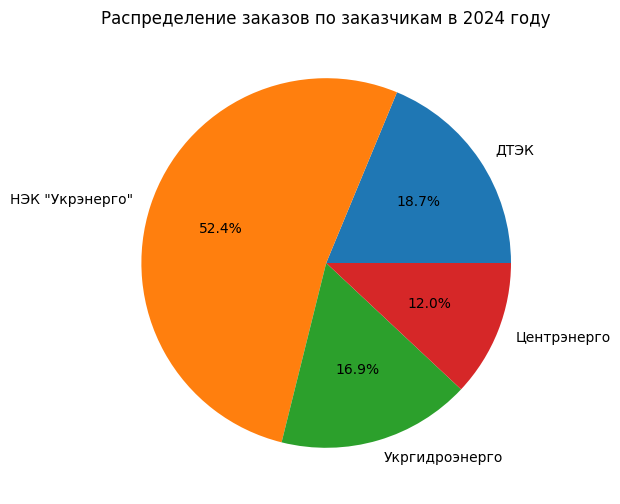

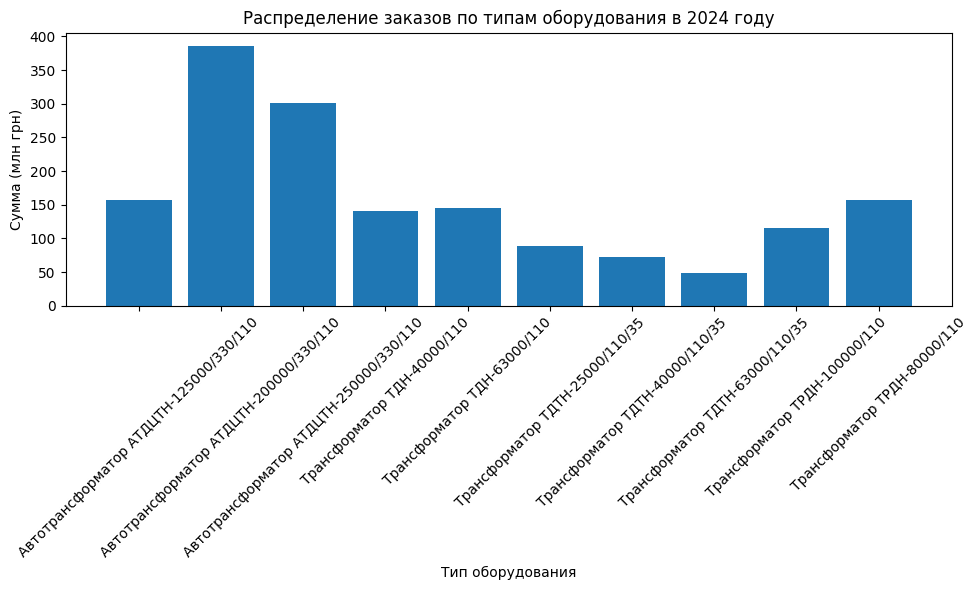

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Загружаем данные из таблицы
data = {
    'Дата тендера': ['16.01.2024', '28.01.2024', '05.02.2024', '12.02.2024', '24.03.2024',
                    '12.04.2024', '28.04.2024', '15.05.2024', '29.06.2024', '18.07.2024',
                    '25.08.2024', '14.09.2024', '22.10.2024', '08.11.2024', '19.12.2024',
                    '15.01.2025', '29.01.2025', '10.02.2025'],
    'Заказчик': ['НЭК "Укрэнерго"', 'ДТЭК', 'Центрэнерго', 'Укргидроэнерго', 'НЭК "Укрэнерго"',
                 'ДТЭК', 'Центрэнерго', 'Укргидроэнерго', 'НЭК "Укрэнерго"', 'ДТЭК',
                 'Центрэнерго', 'НЭК "Укрэнерго"', 'Укргидроэнерго', 'ДТЭК', 'НЭК "Укрэнерго"',
                 'Центрэнерго', 'НЭК "Укрэнерго"', 'ДТЭК'],
    'Тип оборудования': ['Автотрансформатор АТДЦТН-250000/330/110', 'Трансформатор ТДТН-40000/110/35',
                        'Трансформатор ТДН-63000/110', 'Трансформатор ТРДН-80000/110',
                        'Автотрансформатор АТДЦТН-200000/330/110', 'Трансформатор ТДН-40000/110',
                        'Трансформатор ТДТН-63000/110/35', 'Трансформатор ТРДН-100000/110',
                        'Автотрансформатор АТДЦТН-250000/330/110', 'Трансформатор ТДТН-25000/110/35',
                        'Трансформатор ТДН-63000/110', 'Автотрансформатор АТДЦТН-125000/330/110',
                        'Трансформатор ТРДН-80000/110', 'Трансформатор ТДН-40000/110',
                        'Автотрансформатор АТДЦТН-200000/330/110', 'Трансформатор ТДТН-63000/110/35',
                        'Автотрансформатор АТДЦТН-250000/330/110', 'Трансформатор ТДН-40000/110'],
    'Кол-во': [2, 2, 1, 2, 3, 2, 1, 2, 1, 3, 2, 2, 1, 2, 1, 2, 1, 2],
    'Сумма (млн грн)': [198.4, 72.6, 45.8, 102.3, 289.5, 68.4, 48.6, 115.8, 102.8, 89.4,
                      98.6, 156.4, 54.2, 71.6, 96.8, 102.4, 105.6, 74.8]
}

df = pd.DataFrame(data)

# 1. Динамика общей суммы контрактов по годам
plt.figure(figsize=(10, 6))
plt.plot(df['Дата тендера'], df['Сумма (млн грн)'], marker='o', linestyle='-')
plt.title('Динамика общей суммы контрактов')
plt.xlabel('Дата')
plt.ylabel('Сумма (млн грн)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Динамика средней стоимости единицы оборудования по годам
plt.figure(figsize=(10, 6))
plt.plot(df['Дата тендера'], df['Сумма (млн грн)'] / df['Кол-во'], marker='o', linestyle='-')
plt.title('Динамика средней стоимости единицы оборудования')
plt.xlabel('Дата')
plt.ylabel('Средняя стоимость (млн грн)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Распределение заказов по заказчикам в 2024 году
plt.figure(figsize=(8, 6))
df_2024 = df[pd.to_datetime(df['Дата тендера']).dt.year == 2024]
customer_orders = df_2024.groupby('Заказчик')['Сумма (млн грн)'].sum()
plt.pie(customer_orders, labels=customer_orders.index, autopct='%1.1f%%')
plt.title('Распределение заказов по заказчикам в 2024 году')
plt.show()

# 4. Распределение заказов по типам оборудования в 2024 году
plt.figure(figsize=(10, 6))
equipment_orders = df_2024.groupby('Тип оборудования')['Сумма (млн грн)'].sum()
plt.bar(equipment_orders.index, equipment_orders.values)
plt.title('Распределение заказов по типам оборудования в 2024 году')
plt.xlabel('Тип оборудования')
plt.ylabel('Сумма (млн грн)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Зависимость стоимости 1 МВА от мощности трансформатора
# (Для этого графика нужны данные о мощности трансформаторов)

# 6. Сравнительная диаграмма стоимости 1 МВА для разных типов оборудования
# (Для этого графика нужны данные о мощности трансформаторов)

# 7. Динамика стоимости 1 МВА для автотрансформаторов и трансформаторов (110 кВ) по годам
# (Для этого графика нужны данные о мощности трансформаторов)

# 8. Относительное удорожание стоимости 1 МВА в зависимости от мощности трансформатора
# (Для этого графика нужны данные о мощности трансформаторов)

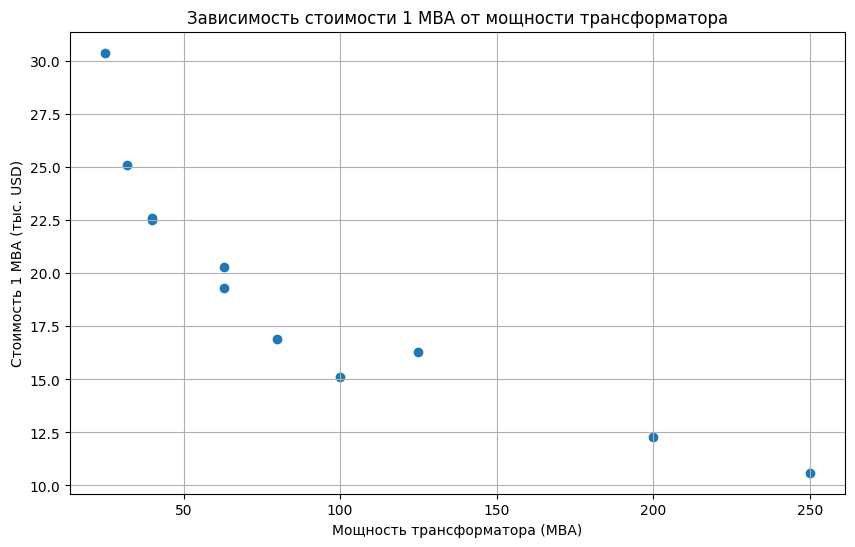

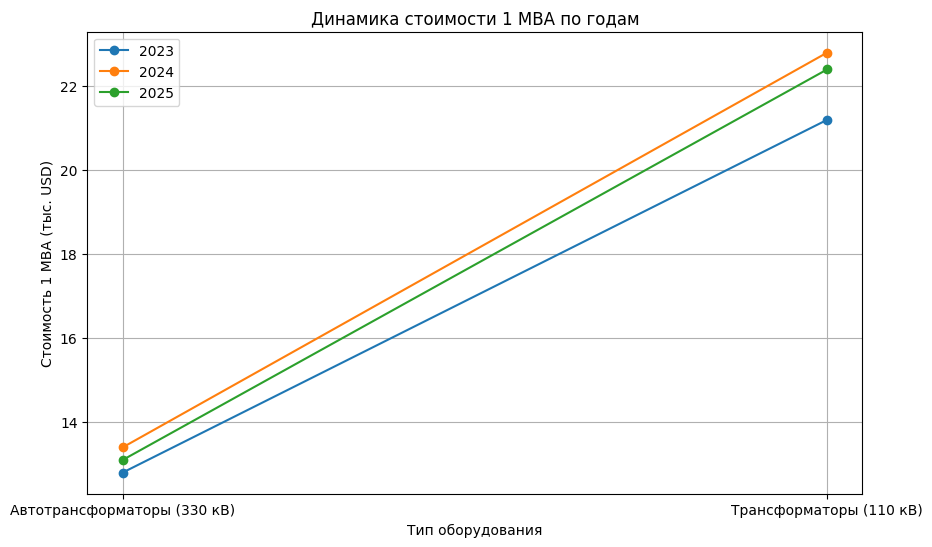

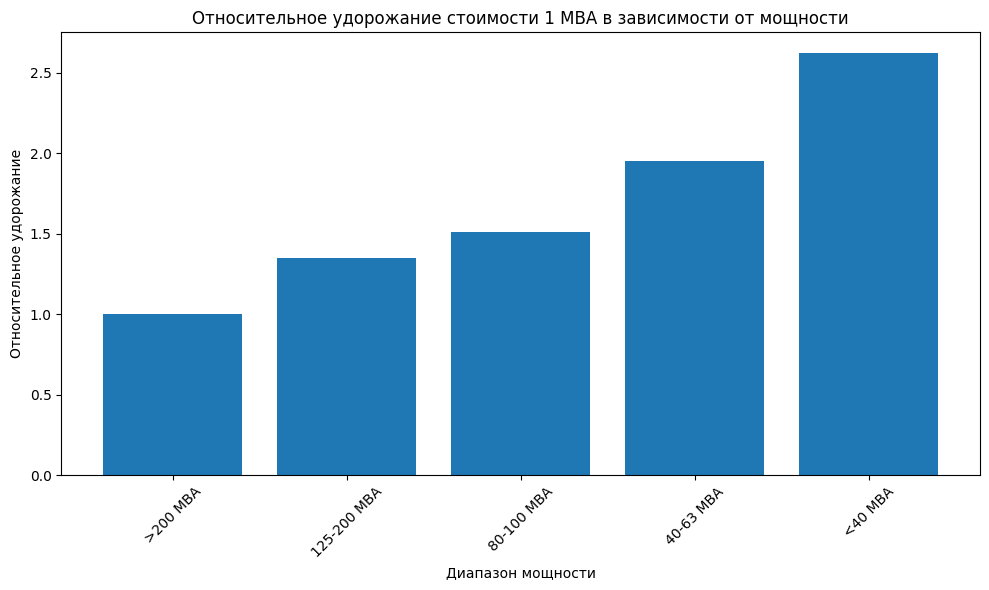

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Загружаем данные из таблиц
cost_per_mva = pd.DataFrame({
    'Тип оборудования': ['АТДЦТН-250000/330/110', 'АТДЦТН-200000/330/110', 'АТДЦТН-125000/330/110',
                        'ТРДН-100000/110', 'ТРДН-80000/110', 'ТДТН-63000/110/35', 'ТДН-63000/110',
                        'ТДТН-40000/110/35', 'ТДН-40000/110', 'ТДТН-25000/110/35', 'ТДН-32000/110'],
    'Мощность (МВА)': [250, 200, 125, 100, 80, 63, 63, 40, 40, 25, 32],
    'Средняя цена единицы (млн грн)': [101.1, 93.3, 77.2, 57.4, 51.4, 48.7, 46.1, 34.2, 34.3, 28.9, 30.5],
    'Стоимость 1 МВА (тыс. грн)': [404.4, 466.5, 617.6, 574.0, 642.5, 773.0, 731.7, 855.0, 857.5, 1156.0, 953.1],
    'Стоимость 1 МВА (тыс. USD)': [10.6, 12.3, 16.3, 15.1, 16.9, 20.3, 19.3, 22.5, 22.6, 30.4, 25.1]
})

cost_dynamics = pd.DataFrame({
    'Тип оборудования': ['Автотрансформаторы (330 кВ)', 'Трансформаторы (110 кВ)'],
    '2023 (тыс. USD/МВА)': [12.8, 21.2],
    '2024 (тыс. USD/МВА)': [13.4, 22.8],
    '2025 (тыс. USD/МВА)': [13.1, 22.4]
})

cost_vs_power = pd.DataFrame({
    'Диапазон мощности': ['>200 МВА', '125-200 МВА', '80-100 МВА', '40-63 МВА', '<40 МВА'],
    'Средняя стоимость 1 МВА (тыс. USD)': [10.6, 14.3, 16.0, 20.7, 27.8],
    'Относительное удорожание**': [1.0, 1.35, 1.51, 1.95, 2.62]
})

# 1. Зависимость стоимости 1 МВА от мощности
plt.figure(figsize=(10, 6))
plt.scatter(cost_per_mva['Мощность (МВА)'], cost_per_mva['Стоимость 1 МВА (тыс. USD)'])
plt.title('Зависимость стоимости 1 МВА от мощности трансформатора')
plt.xlabel('Мощность трансформатора (МВА)')
plt.ylabel('Стоимость 1 МВА (тыс. USD)')
plt.grid(True)
plt.show()

# 2. Динамика стоимости 1 МВА по годам для разных типов оборудования
plt.figure(figsize=(10, 6))
plt.plot(cost_dynamics['Тип оборудования'], cost_dynamics['2023 (тыс. USD/МВА)'], marker='o', label='2023')
plt.plot(cost_dynamics['Тип оборудования'], cost_dynamics['2024 (тыс. USD/МВА)'], marker='o', label='2024')
plt.plot(cost_dynamics['Тип оборудования'], cost_dynamics['2025 (тыс. USD/МВА)'], marker='o', label='2025')
plt.title('Динамика стоимости 1 МВА по годам')
plt.xlabel('Тип оборудования')
plt.ylabel('Стоимость 1 МВА (тыс. USD)')
plt.legend()
plt.grid(True)
plt.show()

# 3. Относительное удорожание стоимости 1 МВА в зависимости от мощности
plt.figure(figsize=(10, 6))
plt.bar(cost_vs_power['Диапазон мощности'], cost_vs_power['Относительное удорожание**'])
plt.title('Относительное удорожание стоимости 1 МВА в зависимости от мощности')
plt.xlabel('Диапазон мощности')
plt.ylabel('Относительное удорожание')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()